# Supervised Learning on Breast Cancer Dataset

## Objective
To evaluate and compare various supervised classification algorithms on the Breast Cancer dataset using scikit-learn.



# 1. Loading and Preprocessing

In [11]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Combine features and target
df = pd.concat([X, y], axis=1)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [13]:
df.shape

(569, 31)

In [15]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [21]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [25]:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


#### The dataset has no missing values, so we don’t need imputation.

## Outlier Detection & Treatment
We can detect outliers using the IQR method.

In [40]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Compute IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR)))
print("Outliers per feature:\n", outliers.sum())

# Cap outliers to IQR bounds
X_capped = X.copy()
for col in X.columns:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    X_capped[col] = np.where(X_capped[col] < lower, lower, 
                             np.where(X_capped[col] > upper, upper, X_capped[col]))

# Optional: Recombine with target if needed
df_capped = pd.concat([X_capped, y], axis=1)


Outliers per feature:
 mean radius                14
mean texture                7
mean perimeter             13
mean area                  25
mean smoothness             6
mean compactness           16
mean concavity             18
mean concave points        10
mean symmetry              15
mean fractal dimension     15
radius error               38
texture error              20
perimeter error            38
area error                 65
smoothness error           30
compactness error          28
concavity error            22
concave points error       19
symmetry error             27
fractal dimension error    28
worst radius               17
worst texture               5
worst perimeter            15
worst area                 35
worst smoothness            7
worst compactness          16
worst concavity            12
worst concave points        0
worst symmetry             23
worst fractal dimension    24
dtype: int64


In [42]:
df_capped.shape

(569, 31)

In [44]:
outliers = ((X_capped < (Q1 - 1.5 * IQR)) | (X_capped > (Q3 + 1.5 * IQR)))
print("Outliers per feature:\n", outliers.sum())

Outliers per feature:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


### Check for Duplicate Rows

In [47]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


##### no duplicate values found

### Feature Scaling

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_capped)

##### Standardization: Used StandardScaler to scale features to zero mean and unit variance. Algorithms like SVM and KNN are sensitive to feature scales.

# 2. Classification Algorithm Implementation 

### Train-Test Split

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Logistic Regression
📘 How it works:
Logistic Regression is a linear model used for binary classification.

It calculates the probability that a given input belongs to a particular class using the logistic (sigmoid) function.

It outputs values between 0 and 1, and applies a threshold (e.g., 0.5) to classify.

✅ Why suitable:
The breast cancer dataset has features that are mostly linearly separable.

Logistic regression performs very well with high-dimensional and continuous data, like this dataset.



In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

📌 Description: Logistic Regression models the probability of class membership using the logistic function. Suitable for binary classification.

### Decision Tree Classifier
📘 How it works:
A decision tree splits data recursively based on feature values.

Each internal node represents a feature condition; leaf nodes represent class labels.

It selects features and thresholds that result in the best split using criteria like Gini index or entropy.

✅ Why suitable:
It handles non-linear relationships and is easy to interpret.

Good for understanding feature importance.

However, prone to overfitting unless pruned or regularized.

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)


📌 Description: Splits data based on feature thresholds. Easy to interpret but can overfit without pruning.

###  Random Forest Classifier
📘 How it works:
An ensemble of decision trees trained on random subsets of data and features.

Uses bagging (Bootstrap Aggregation) and majority voting to make final predictions.

Helps reduce overfitting and improves generalization.

✅ Why suitable:
Effective for high-dimensional datasets with many features like this one.

Reduces overfitting compared to a single decision tree.

Performs well without much hyperparameter tuning.

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)


📌 Description: Ensemble of decision trees that reduces overfitting. Handles high-dimensional data well.

### Support Vector Machine (SVM)
📘 How it works:
Finds the optimal hyperplane that separates classes by the maximum margin.

Can use kernels to handle non-linear separations (e.g., polynomial or RBF kernel).

✅ Why suitable:
Works well in high-dimensional spaces and is robust to overfitting, especially with a linear kernel.

Since the breast cancer dataset has well-separated classes, SVM performs efficiently.

In [80]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')  # Linear kernel works well here
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)


📌 Description: Finds the hyperplane that maximizes margin. Effective in high-dimensional spaces.

### k-Nearest Neighbors (k-NN)
📘 How it works:
A non-parametric algorithm that classifies a sample based on the majority class among its k nearest neighbors.

Uses distance metrics (like Euclidean) to find neighbors.

✅ Why suitable:
Simple and effective on smaller datasets with clear class boundaries.

Works well when data is well-distributed and properly scaled (as done in preprocessing).

However, it's computationally expensive on large datasets and sensitive to irrelevant features.

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)


📌 Description: Classifies based on the majority label of nearest data points. Sensitive to scaling and irrelevant features.

#  3. Model Comparison

In [89]:
print("Logistic Regression Accuracy:", acc_lr)
print("Decision Tree Accuracy:", acc_dt)
print("Random Forest Accuracy:", acc_rf)
print("SVM Accuracy:", acc_svm)
print("k-NN Accuracy:", acc_knn)


Logistic Regression Accuracy: 0.9824561403508771
Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544
SVM Accuracy: 0.9649122807017544
k-NN Accuracy: 0.956140350877193


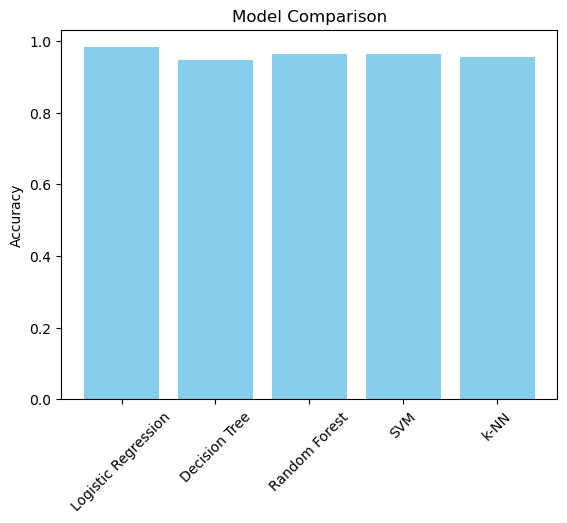

In [91]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'k-NN']
accuracies = [acc_lr, acc_dt, acc_rf, acc_svm, acc_knn]

plt.bar(models, accuracies, color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()


##
📝 Conclusion:<br>
|
✅ Best Performing Model: Logistic Regression with an accuracy of 98.25%.

It works well here likely due to the linear separability of the breast cancer dataset.

❌ Worst Performing Model: Decision Tree, though still fairly accurate at 94.74%.

It may be overfitting due to its greedy, unpruned nature.

| Classifier             | Accuracy (%) |
| ---------------------- | ------------ |
| Logistic Regression    | **98.25%** ✅ |
| Random Forest          | 96.49%       |
| Support Vector Machine | 96.49%       |
| k-Nearest Neighbors    | 95.61%       |
| Decision Tree          | **94.74%** ❌ |
